<a href="https://colab.research.google.com/github/thanhyx4/H-M-Personalized-Fashion-Recommendations/blob/main/Parameters4Repurchase_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

from tqdm import tqdm
from scipy.optimize import curve_fit

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
df_tran = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/H&M_RecSys/transactions_train.csv", 
                      usecols = ['article_id', 'customer_id', 't_dat', 'price'],dtype={'article_id': str})

In [22]:
df_tran['t_dat'] = pd.to_datetime(df_tran['t_dat'])

In [36]:
#check 
df_tran[df_tran['price'] == 0]

,t_dat,customer_id,article_id,price


In [24]:
gb = df_tran.groupby(['customer_id', 'article_id'])['t_dat'].nunique()
inx = gb[gb>1].index    #inx: cus, art >= 2 times
del gb

In [ ]:
df_tran = df_tran.set_index(['customer_id', 'article_id'])
df_tran = df_tran.loc[inx].copy().sort_index()

# check repurchase on price

In [31]:
df_tran1 = df_tran.copy()
df_tran1.reset_index(inplace=True)

In [ ]:
df_tran1.groupby('article_id')

# on days

In [13]:
df_tran['shift_dat'] = df_tran.groupby(level=[0,1])['t_dat'].shift(1)
df_tran['dist'] = (df_tran['t_dat'] - df_tran['shift_dat']).dt.days
dist = df_tran.loc[df_tran['dist'].notna(), 'dist'].values
vc = df_tran['dist'].value_counts()
vc = vc[1:]

In [15]:
df_tran.head()

t_dat  \
customer_id                                        article_id              
0000423b00ade91418cceaf3b26c6af3dd342b51fd051ee... 0351484002 2019-05-07   
                                                   0351484002 2019-06-18   
                                                   0351484002 2020-04-22   
                                                   0583558001 2018-09-21   
                                                   0583558001 2018-09-27   

                                                               shift_dat  \
customer_id                                        article_id              
0000423b00ade91418cceaf3b26c6af3dd342b51fd051ee... 0351484002        NaT   
                                                   0351484002 2019-05-07   
                                                   0351484002 2019-06-18   
                                                   0583558001        NaT   
                                                   0583558001 2018-09-21   

                                                                dist  
customer_id                                        article_id         
0000423b00ade91418cceaf3b26c6af3dd342b51fd051ee... 0351484002    NaN  
                                                   0351484002   42.0  
                                                   0351484002  309.0  
                                                   0583558001    NaN  
                                                   0583558001    6.0

In [16]:
vc.head()

1.0    134480
2.0    131695
3.0    106943
4.0     83687
5.0     64398
Name: dist, dtype: int64

<ipython-input-32-e34b495c928f>:2: RuntimeWarning: overflow encountered in exp
  return a / np.sqrt(x) + b * np.exp(-c*x) + d


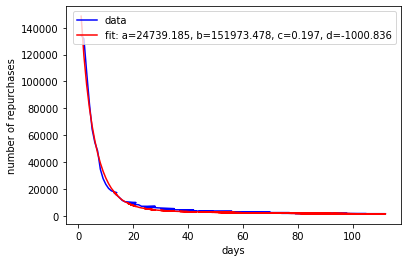

In [32]:
def func(x, a, b, c, d):
    return a / np.sqrt(x) + b * np.exp(-c*x) + d

popt, pcov = curve_fit(func, vc.index, vc.values)           #index: so ngay /values: so san pham duoc mua lai

plt.plot(vc.index[:100], vc.values[:100], 'b-', label='data')
plt.plot(vc.index[:100], func(vc.index[:100], *popt), 'r-',
        label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))

plt.xlabel('days')
plt.ylabel('number of repurchases')
plt.legend()
plt.show()

# 